In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset')

Dataset URL: https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset


100%|██████████| 15.8k/15.8k [00:00<00:00, 24.3MB/s]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


Data Handling

In [7]:
# let us drop month and year features. They are just for the record and has no impact on the model, until suggested by the domain people.

In [8]:
data.drop(columns=['Year', 'Month'], axis=1, inplace=True)

In [9]:
# No missing values in the dataset.

In [10]:
# This is a binary classification problem --- Tsunami (1) and No Tsunami (0)

In [11]:
# let us check for any outliers

In [14]:
def outliersDetect(colData):
  sorted(colData)

  Q1, Q3 = np.percentile(colData, [25, 75])

  IQR = Q3 - Q1

  lr = Q1 - (1.5 * IQR)
  ur = Q3 + (1.5 * IQR)

  return lr, ur

In [15]:
cols = data.columns

for col in cols:
  lowerRange, upperRange = outliersDetect(data[col])
  print(f'Outliers range of {col}')
  print(f'Lower: {lowerRange}| Upper: {upperRange}\n')

Outliers range of magnitude
Lower: 5.85| Upper: 7.85

Outliers range of cdi
Lower: -10.5| Upper: 17.5

Outliers range of mmi
Lower: 2.0| Upper: 10.0

Outliers range of sig
Lower: 362.875| Upper: 1237.875

Outliers range of nst
Lower: -667.5| Upper: 1112.5

Outliers range of dmin
Lower: -2.7945| Upper: 4.657500000000001

Outliers range of gap
Lower: -8.4375| Upper: 53.0625

Outliers range of depth
Lower: -39.625| Upper: 103.375

Outliers range of latitude
Lower: -73.47075000000001| Upper: 83.52965

Outliers range of longitude
Lower: -402.58162500000003| Upper: 479.85457500000007

Outliers range of tsunami
Lower: -1.5| Upper: 2.5



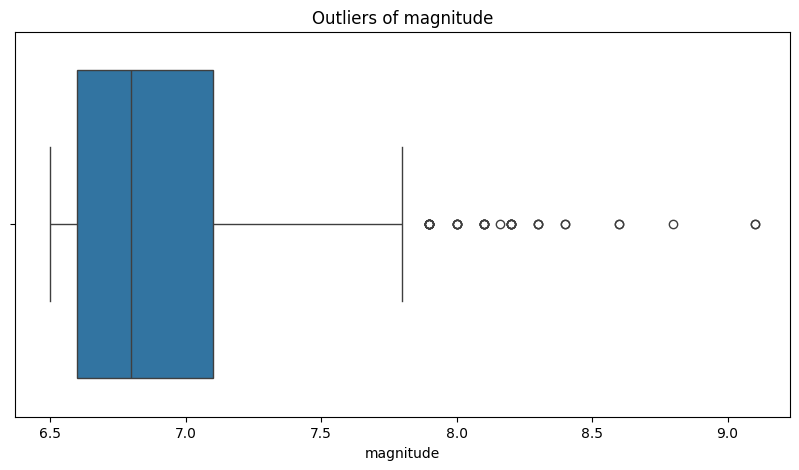

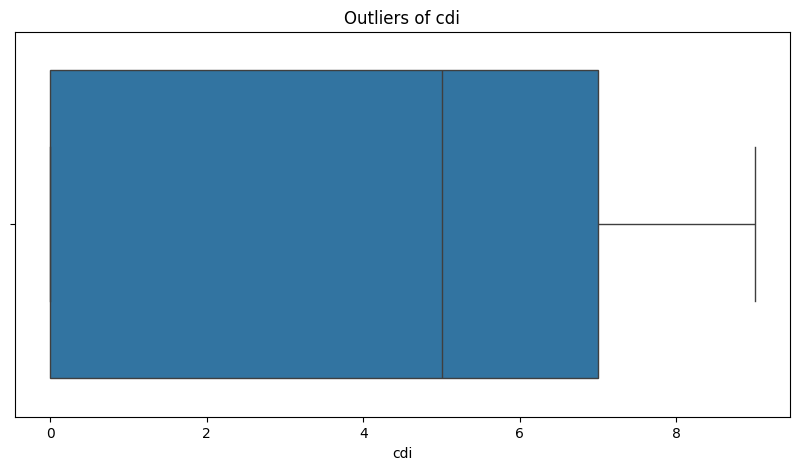

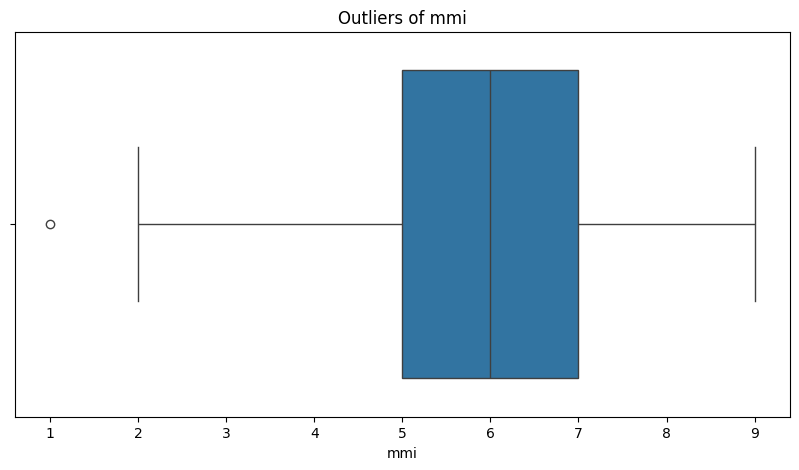

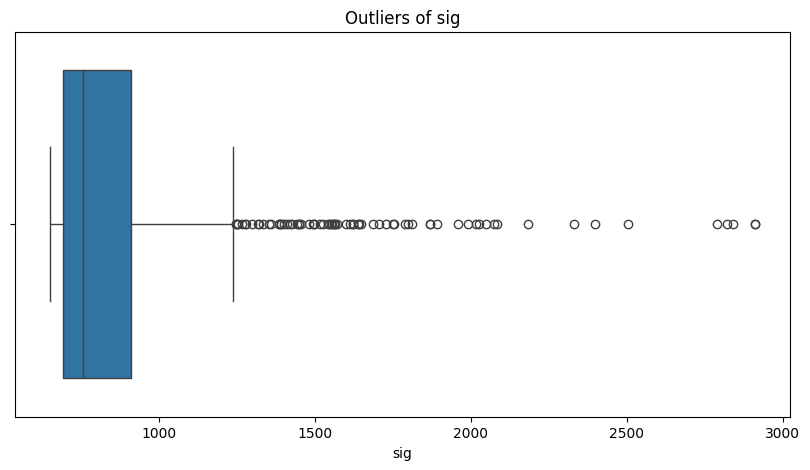

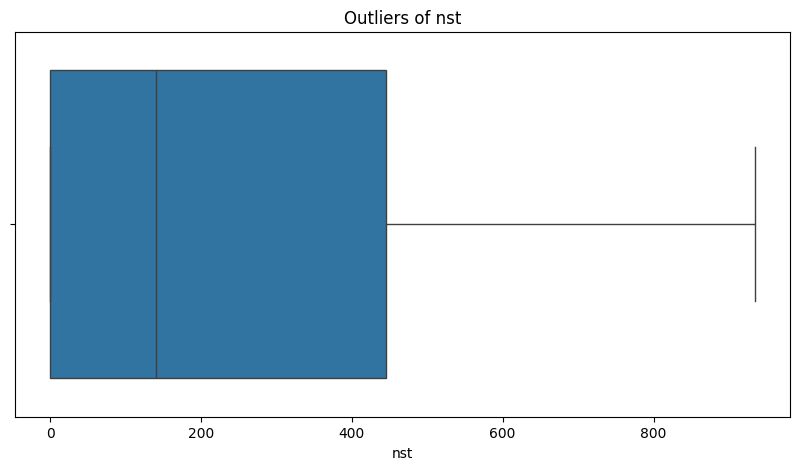

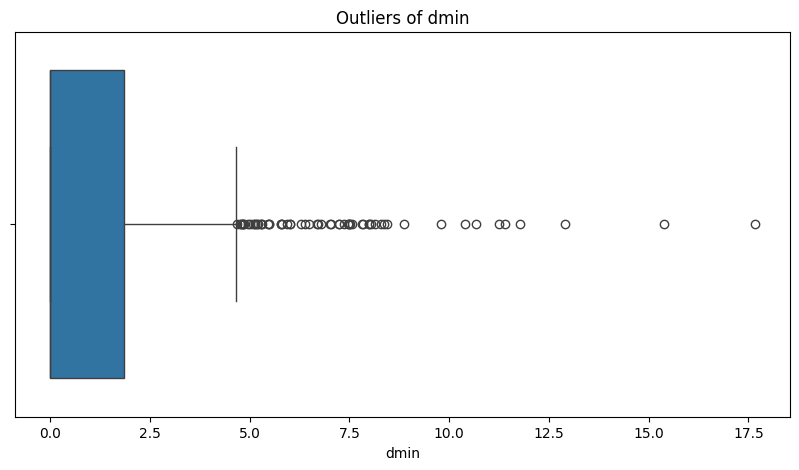

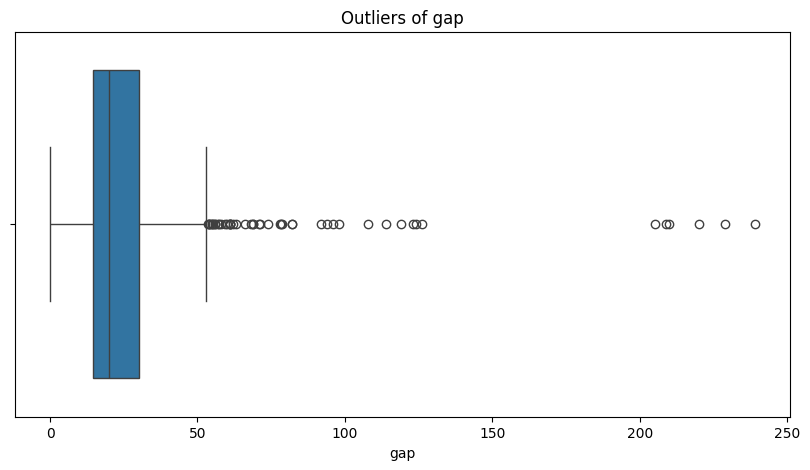

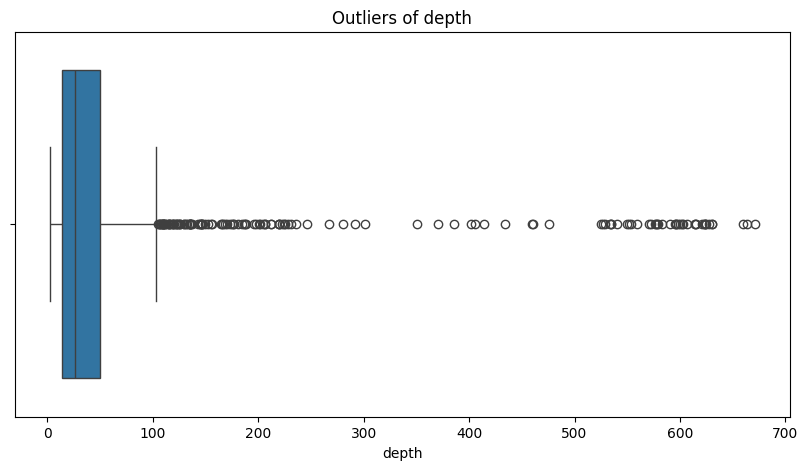

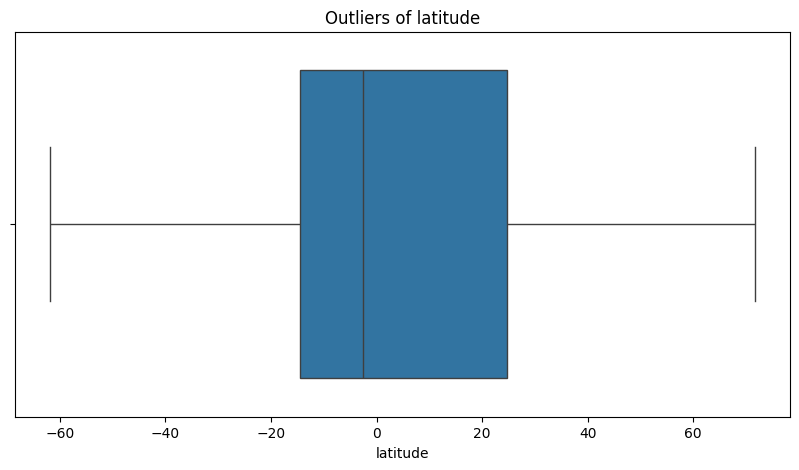

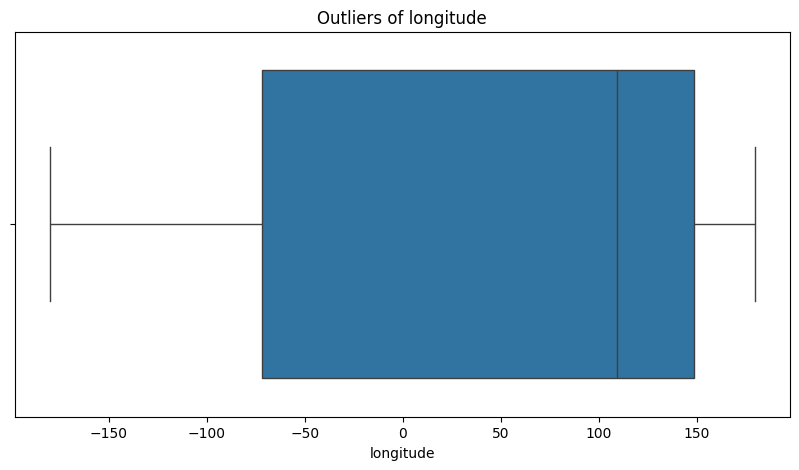

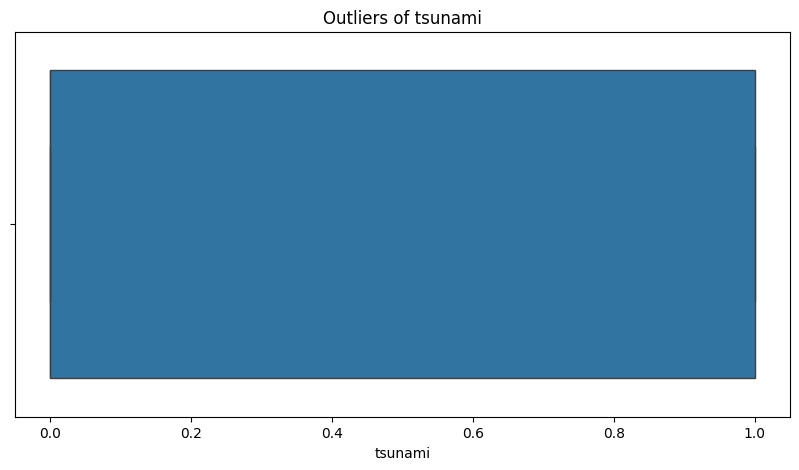

In [16]:
for col in cols:
  plt.figure(figsize=(10, 5))
  sns.boxplot(data=data, x=col)
  plt.title(f'Outliers of {col}')
  plt.show()

In [17]:
outliers_cols = ['magnitude', 'mmi', 'sig', 'dmin', 'gap', 'depth']

for col in outliers_cols:
  lr, ur = outliersDetect(data[col])
  data = data[ (data[col] >= lr) & (data[col] <= ur)]

In [18]:
data.reset_index(drop=True, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  487 non-null    float64
 1   cdi        487 non-null    int64  
 2   mmi        487 non-null    int64  
 3   sig        487 non-null    int64  
 4   nst        487 non-null    int64  
 5   dmin       487 non-null    float64
 6   gap        487 non-null    float64
 7   depth      487 non-null    float64
 8   latitude   487 non-null    float64
 9   longitude  487 non-null    float64
 10  tsunami    487 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 42.0 KB


In [20]:
cols = data.columns
cols

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'tsunami'],
      dtype='object')

EDA

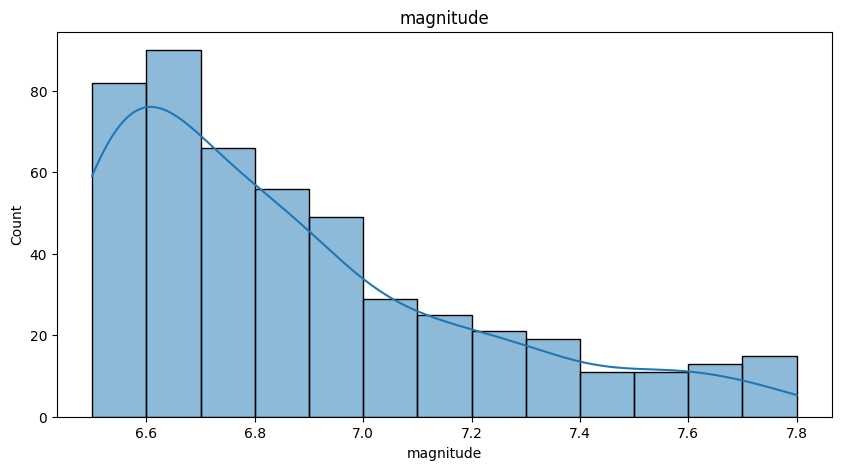

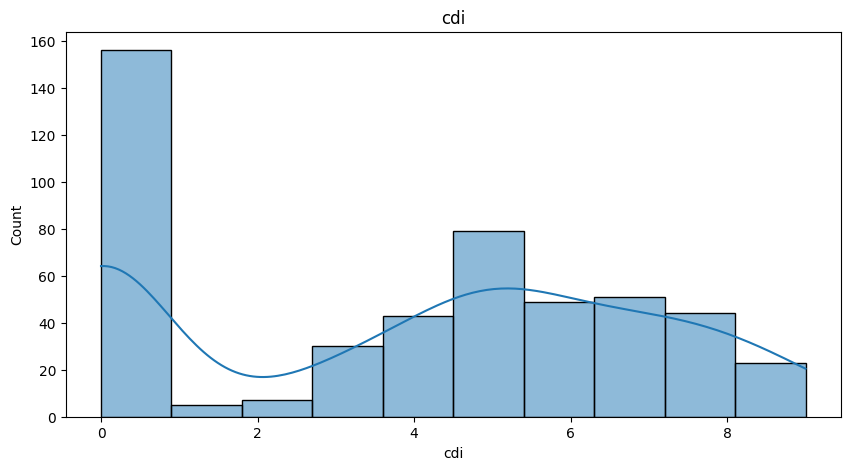

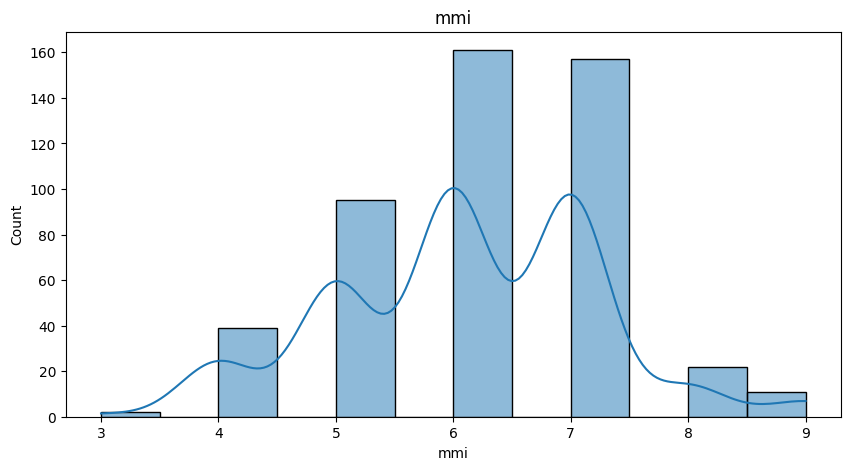

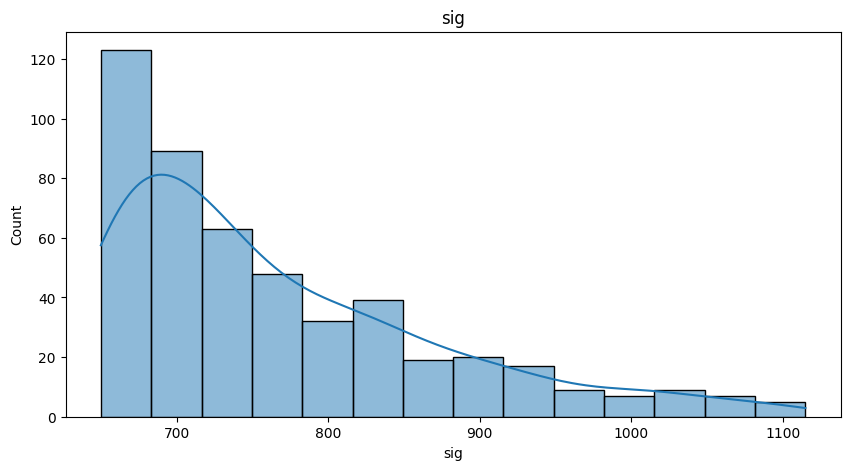

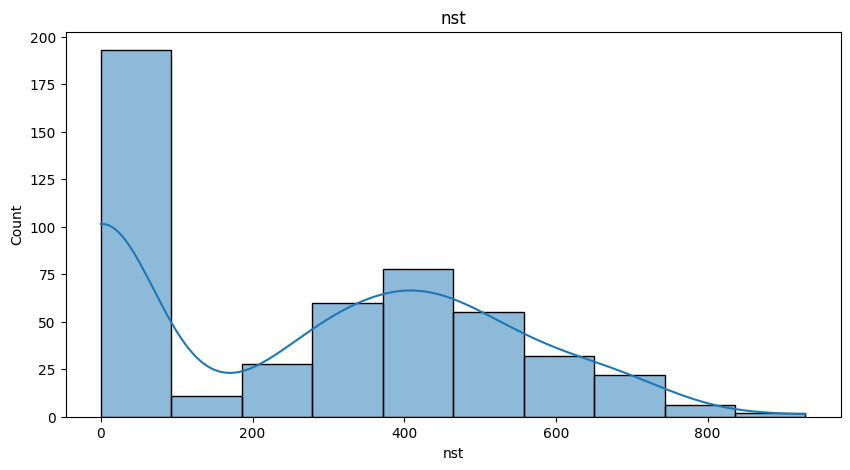

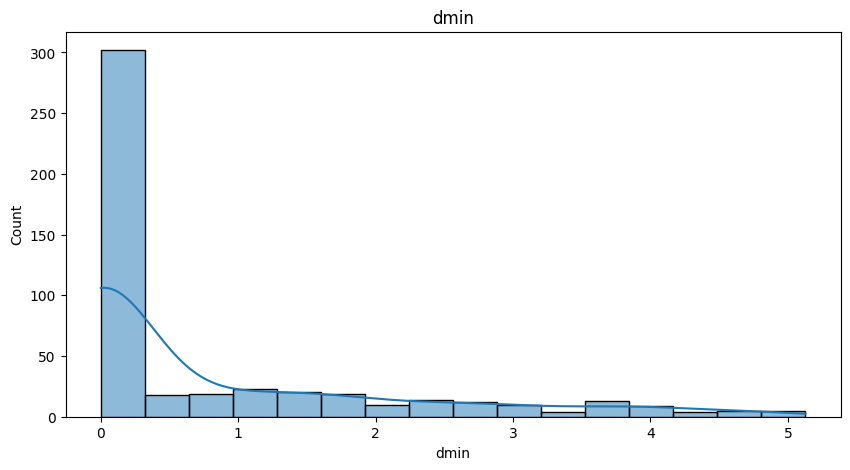

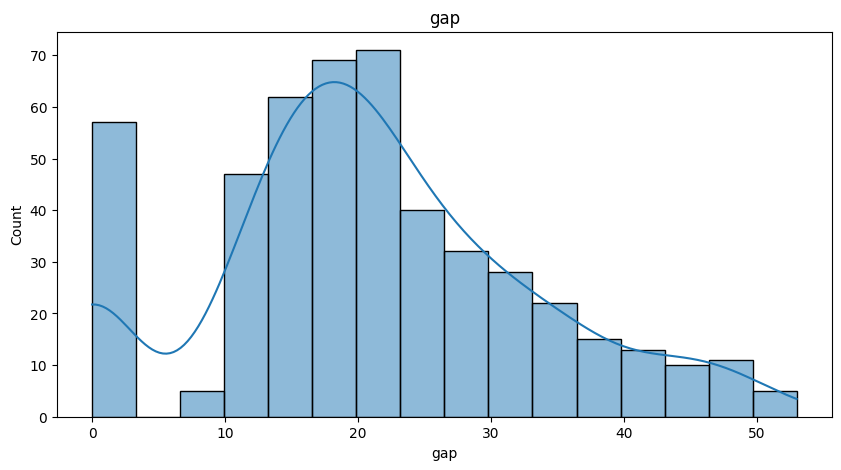

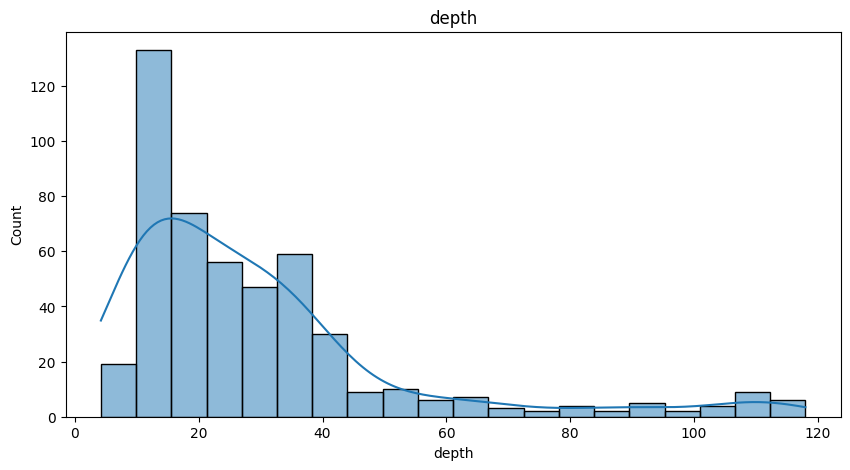

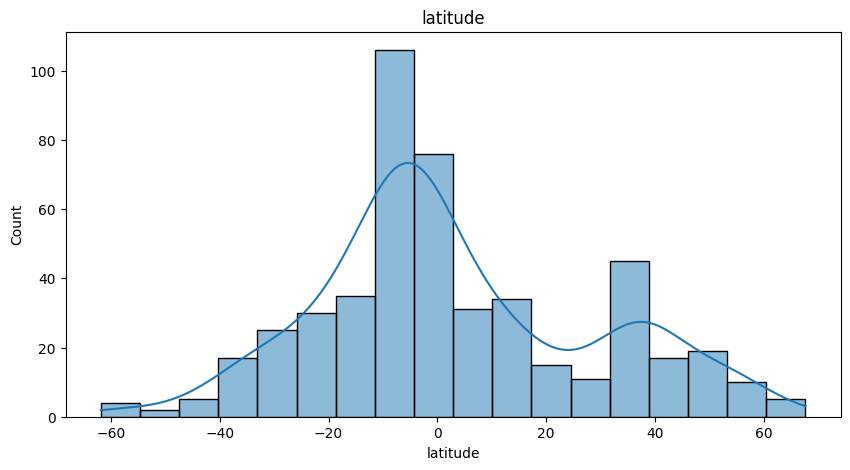

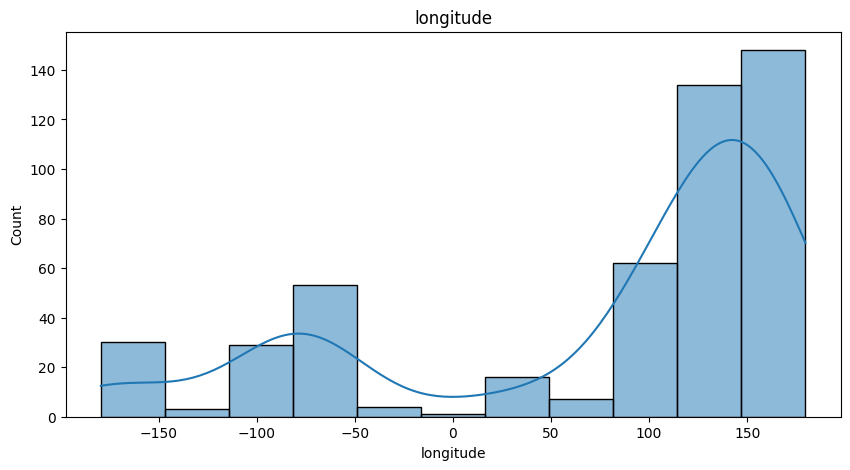

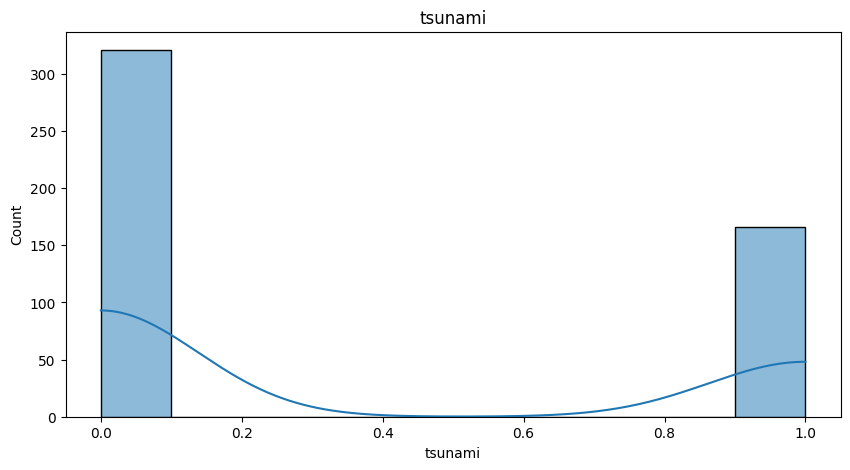

In [22]:
for col in cols:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=data, x=col, kde=True)
  plt.title(f'{col}')
  plt.xlabel(f'{col}')
  plt.show()

In [23]:
data['tsunami'].value_counts()

,count
tsunami,
0,321
1,166


In [24]:
feat = data.drop('tsunami', axis=1)
lab = data['tsunami']

In [25]:
# It is an imbalanced dataset

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

resampled_features, resampled_label = smote.fit_resample(feat, lab)

In [27]:
resampled_label.value_counts()

,count
tsunami,
1,321
0,321


Data Preprocessing

In [28]:
features = resampled_features
label = resampled_label

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_features = sc.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [30]:
scaled_features_df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude
0,0.482443,1.351600,0.909420,0.026793,-0.404155,-0.396952,-0.391309,-0.676336,-0.497098,0.783295
1,0.169150,-0.004224,-1.736414,-0.289088,-0.477811,0.923471,1.107731,-0.184174,-0.305013,0.266810
2,1.422323,0.334732,-0.854470,0.648983,-0.273210,0.644033,-0.038593,0.352731,-0.873914,-2.127629
3,-0.457437,1.012644,0.027475,0.304386,-0.289578,0.095903,1.372267,-0.407884,0.196075,-1.339717
4,0.169150,1.690556,2.673309,1.165880,-0.003136,-0.479863,1.107731,-0.855305,0.810108,0.447305


Model building

In [31]:
final_features = scaled_features_df.values
final_label = label.values

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

dt_scores = cross_val_score(model, final_features, final_label, cv=5)

print(dt_scores)

print(f'CL: {dt_scores.mean()}')


[0.62015504 0.94573643 0.8125     0.9375     0.703125  ]
CL: 0.8038032945736434


In [33]:
# As per Cross validation of Decision Tree, the confidence level is 0.80

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rf_scores = cross_val_score(model, final_features, final_label, cv=5)

print(rf_scores)

print(f'CL: {rf_scores.mean()}')


[0.63565891 0.99224806 0.8671875  0.9609375  0.921875  ]
CL: 0.8755813953488373


In [35]:
# As per Cross validation of Decision Tree, the confidence level is 0.87

In [ ]:
# Let us first go with Decision Tree Classifier

In [36]:
dt_cl = np.round(dt_scores.mean(), 2)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

for seed in range(1, 301):
  X_train, X_test, y_train, y_test = train_test_split(final_features, final_label, test_size=0.2, random_state=seed)

  model = DecisionTreeClassifier()

  model.fit(X_train, y_train)

  trainScore = model.score(X_train, y_train)
  testScore = model.score(X_test, y_test)

  if testScore > trainScore and testScore >= dt_cl:
    print(f'Test score: {testScore} | Train Score: {trainScore} | random state: {seed}')

In [37]:
# Let us tweak the max_depth hyperparameter

In [38]:
dt_cl = np.round(dt_scores.mean(), 2)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

for seed in range(1, 301):
  X_train, X_test, y_train, y_test = train_test_split(final_features, final_label, test_size=0.2, random_state=seed)

  model = DecisionTreeClassifier(max_depth=5)

  model.fit(X_train, y_train)

  trainScore = model.score(X_train, y_train)
  testScore = model.score(X_test, y_test)

  if testScore > trainScore and testScore >= dt_cl:
    print(f'Test score: {testScore} | Train Score: {trainScore} | random state: {seed}')

Test score: 0.937984496124031 | Train Score: 0.9317738791423001 | random state: 100
Test score: 0.9534883720930233 | Train Score: 0.9337231968810916 | random state: 104
Test score: 0.9457364341085271 | Train Score: 0.9298245614035088 | random state: 121
Test score: 0.9457364341085271 | Train Score: 0.9454191033138402 | random state: 127
Test score: 0.9767441860465116 | Train Score: 0.9298245614035088 | random state: 155
Test score: 0.9534883720930233 | Train Score: 0.935672514619883 | random state: 156
Test score: 0.9457364341085271 | Train Score: 0.9298245614035088 | random state: 169
Test score: 0.9534883720930233 | Train Score: 0.935672514619883 | random state: 296


In [39]:
# Didnt get any output initially because the data was overfitting. When tweaked with the max_depth, DT Classifier is
# giving a best score of --- Test score: 0.9767441860465116 | Train Score: 0.9298245614035088 | random state: 155

In [40]:
# Let us try with Random Forest which does Bagging and Decision tree together.

In [43]:
rf_cl = np.round(rf_scores.mean(), 2)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

for seed in range(1, 301):
  X_train, X_test, y_train, y_test = train_test_split(final_features, final_label, test_size=0.2, random_state=seed)

  model = RandomForestClassifier(n_estimators=15, max_depth=5)

  model.fit(X_train, y_train)

  trainScore = model.score(X_train, y_train)
  testScore = model.score(X_test, y_test)

  if testScore > trainScore and testScore >= rf_cl:
    print(f'Test score: {testScore} | Train Score: {trainScore} | random state: {seed}')

Test score: 0.937984496124031 | Train Score: 0.9025341130604289 | random state: 1
Test score: 0.9069767441860465 | Train Score: 0.9064327485380117 | random state: 15
Test score: 0.9069767441860465 | Train Score: 0.898635477582846 | random state: 19
Test score: 0.937984496124031 | Train Score: 0.9122807017543859 | random state: 28
Test score: 0.9069767441860465 | Train Score: 0.9025341130604289 | random state: 30
Test score: 0.9147286821705426 | Train Score: 0.9083820662768031 | random state: 53
Test score: 0.937984496124031 | Train Score: 0.9122807017543859 | random state: 62
Test score: 0.9069767441860465 | Train Score: 0.9025341130604289 | random state: 66
Test score: 0.9534883720930233 | Train Score: 0.8908382066276803 | random state: 68
Test score: 0.9069767441860465 | Train Score: 0.9044834307992202 | random state: 69
Test score: 0.9147286821705426 | Train Score: 0.8966861598440545 | random state: 80
Test score: 0.9069767441860465 | Train Score: 0.9025341130604289 | random state: 

In [42]:
# Didnt get any output initially because the data was overfitting. When tweaked with n_estimators and max_depth, RF Classifier is
# giving a best score of --- Test score: 0.9767441860465116 | Train Score: 0.9200779727095516 | random state: 296

In [44]:
# Conclusion: Both the model give same test score of 0.97 approx. which implies both models are well balanced and
# generalized and can predict using the unknown data

In [45]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [46]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [47]:
y_prob

array([[0.31104795, 0.68895205],
       [0.86465499, 0.13534501],
       [0.98633238, 0.01366762],
       [0.96243412, 0.03756588],
       [0.84853139, 0.15146861],
       [0.23480842, 0.76519158],
       [0.22629185, 0.77370815],
       [0.40762953, 0.59237047],
       [0.22764673, 0.77235327],
       [0.24005744, 0.75994256],
       [0.14474524, 0.85525476],
       [0.12623283, 0.87376717],
       [0.92701467, 0.07298533],
       [0.15698882, 0.84301118],
       [0.26017983, 0.73982017],
       [0.86933401, 0.13066599],
       [0.14014464, 0.85985536],
       [0.25026455, 0.74973545],
       [0.97335423, 0.02664577],
       [0.07048799, 0.92951201],
       [0.8359001 , 0.1640999 ],
       [0.2439605 , 0.7560395 ],
       [0.18765072, 0.81234928],
       [0.14729835, 0.85270165],
       [0.04729835, 0.95270165],
       [0.00428319, 0.99571681],
       [0.94507473, 0.05492527],
       [0.81583822, 0.18416178],
       [0.18805602, 0.81194398],
       [0.14932357, 0.85067643],
       [0.

In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy * 100, 2)

np.float64(89.92)

In [55]:
# Inference: Model can make prediction on unknown data with the 89% accuracy

Model deployment

In [56]:
import joblib

In [57]:
joblib.dump(model, 'eq_tsunami_predictor.pkl')

['eq_tsunami_predictor.pkl']

In [58]:
cols

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'tsunami'],
      dtype='object')

In [59]:
for col in cols:
  print(f'{col}\n')
  print(data[col].min())
  print(data[col].max())
  print('\n')

magnitude

6.5
7.8


cdi

0
9


mmi

3
9


sig

650
1115


nst

0
929


dmin

0.0
5.128


gap

0.0
53.0


depth

4.2
118.0


latitude

-61.8484
67.631


longitude

-179.373
179.662


tsunami

0
1




In [61]:
# user inputs

mag = float(input('Enter earthquake magnitude (0.0 - 9.0):'))
cdi = float(input('Enter cdi (0.0 - 9.0):'))
mmi = float(input('Enter mmi (0.0 - 9.0):'))
sig = float(input('Enter sig (600 - 1200):'))
nst = float(input('Enter nst (0 - 1000):'))
dmin = float(input('Enter dmin (0.0 - 7.0):'))
gap = float(input('Enter gap (0 - 75):'))
depth = float(input('Enter depth (0 - 120):'))
lat = float(input('Enter latitude (-90 to +90):'))
lon = float(input('Enter longitude (-180 to +180):'))

final_model = joblib.load('eq_tsunami_predictor.pkl')

prediction = final_model.predict([[mag, cdi, mmi, sig, nst, dmin, gap, depth, lat, lon]])

if prediction[0] == 0:
  print('There is no chance of Tsunami')
else:
  print('Tsunami may occur. Please take safety measures.')

Enter earthquake magnitude (0.0 - 9.0):7.5
Enter cdi (0.0 - 9.0):4.5
Enter mmi (0.0 - 9.0):6.5
Enter sig (600 - 1200):760
Enter nst (0 - 1000):890
Enter dmin (0.0 - 7.0):6.7
Enter gap (0 - 75):45
Enter depth (0 - 120):88
Enter latitude (-90 to +90):-45.678
Enter longitude (-180 to +180):65.346
Tsunami may occur. Please take safety measures.
